### EDA Content: 
- What are the top 10 Product categories based on sales?
- Who are the most valuable customers?
- In each country , which product is sold the most?


In [0]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
sns.set()

In [0]:
retaildata = pd.read_excel("/content/online_retail_II.xlsx")

In [42]:
retaildata.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [43]:
retaildata.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [44]:
retaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
print('Shape of dataset: ', retaildata.shape)

Shape of dataset:  (525461, 8)


In [0]:
def extract_column_types(df):
    num_cols = [i for i in df.columns if df[i].dtype in ['int64','float64']]
    cat_cols = [i for i in df.columns if df[i].dtype in ['object']]
    date_cols = [i for i in df.columns if df[i].dtype in ['datetime64[ns]']]
    bool_cols = [i for i in df.columns if df[i].dtype in ['bool']]
    return(num_cols,cat_cols,date_cols,bool_cols)

In [46]:
num_cols,cat_cols,date_cols,bool_cols = extract_column_types(retaildata)
print ("Numeric Columns:", len(num_cols))
print ("Categorical Columns:", len(cat_cols))
print ("Date Columns:",len(date_cols))
print ("Boolean Columns:",len(bool_cols))

Numeric Columns: 3
Categorical Columns: 4
Date Columns: 1
Boolean Columns: 0


In [0]:
#Filtering the dataset by choosing positive values of Quantity and retaildata
filtered_retaildata = retaildata[(retaildata.Quantity>0) & (retaildata.Price > 0)]

In [48]:
print('Shape of filtered dataset: ', filtered_retaildata.shape)

Shape of filtered dataset:  (511566, 8)


#### What are the top 10 Product categories based on sales?

In [0]:
prod_bought = filtered_retaildata.groupby('Description').agg({'Quantity':np.sum}).reset_index()

In [0]:
x = prod_bought.sort_values('Quantity' , ascending=False).Description.head(10)
y = prod_bought.sort_values('Quantity' , ascending=False).Quantity.head(10)

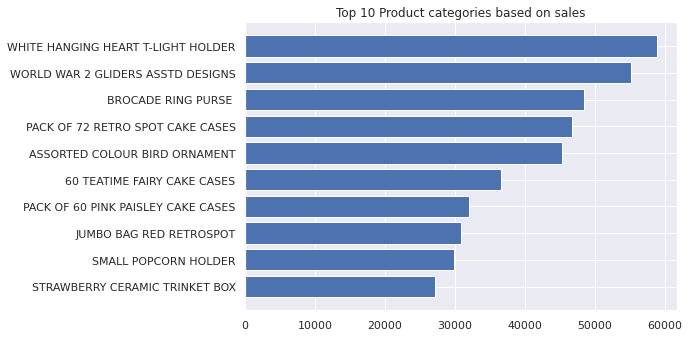

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(x,y)
ax.invert_yaxis()
ax.set_title('Top 10 Product categories based on sales')
plt.show()